In [1]:
import pandas as pd

#### 读取文件

读取 shapefile 文件

In [9]:
import geopandas as gpd

shapefile_path = 'SeattleDemographic.shp'
gdf = gpd.read_file(shapefile_path)
gdf.head()

,GEOID_20,ACRES_LAND,ACRES_WATE,TRACT,BG,TRBG,BG_NAME,TRACT_LABE,C_DISTRICT,VILLNUMB,...,POP_20_64_,POP_20_641,POP_20_642,POP_20_643,SUB_TYPE,CD_TYPE,UCUV_TYPE,Shape_Leng,Shape_Area,geometry
0,530330105022,93.418437,0.000000,10502,2,10502.2,Block Group 2,105.02,1,0.0,...,1420,178,154,1205,Outside Villages,CD,UCUV,9132.543011,4.069196e+06,"POLYGON ((1256065.98 207109.145, 1256060.564 2..."
1,530330106023,74.934707,0.000000,10602,3,10602.3,Block Group 3,106.02,1,0.0,...,920,68,23,821,Outside Villages,CD,UCUV,7252.175209,3.264104e+06,"POLYGON ((1256766.721 205266.409, 1256740.309 ..."
2,530330107012,98.666214,0.000000,10701,2,10701.2,Block Group 2,107.01,1,0.0,...,734,71,0,597,Outside Villages,CD,UCUV,11496.354128,4.297807e+06,"POLYGON ((1262684.558 204417.446, 1262656.721 ..."
3,530330111021,160.180380,282.550178,11102,1,11102.1,Block Group 1,111.02,2,0.0,...,729,15,0,556,Outside Villages,CD,UCUV,16141.467904,6.948791e+06,"POLYGON ((1288695.321 202025.319, 1288695.001 ..."
4,530330111023,29.226142,0.000000,11102,3,11102.3,Block Group 3,111.02,2,0.0,...,709,25,0,543,Outside Villages,CD,UCUV,5191.317410,1.273065e+06,"POLYGON ((1285492.109 199179.917, 1285543.89 1..."


读取geojson文件

In [10]:
import geopandas as gpd

geojson_path = 'Seattle_City_Boundary.geojson'
gdf_geojson = gpd.read_file(geojson_path)

gdf_geojson.head()

,OBJECTID,GEOID20,GROSS_ACRES,LAND_ACRES,WATER_ACRES,NAME,TRACT_NUMB,BASENAME,UVDA_AREA,CRA_NO,CRA_GRP,GEN_ALIAS,DETL_NAMES,C_DISTRICT,geometry
0,1,53033000402,444.493643,444.527261,0.000000,Census Tract 4.02,402,4.02,Bitter Lake Village,9.1,9,Broadview/Bitter Lake,"Broadview, Bitter Lake",5,"POLYGON ((1267598.433 267477.138, 1267788.924 ..."
1,2,53033000403,180.930716,165.408389,15.535762,Census Tract 4.03,403,4.03,Bitter Lake Village,9.1,9,Broadview/Bitter Lake,"Broadview, Bitter Lake",5,"POLYGON ((1265848.993 271492.767, 1265842.812 ..."
2,3,53033000700,319.838996,319.862596,0.000000,Census Tract 7,700,7,Lake City,8.2,8,Olympic Hills/Victory Heights,"Lake City, Victory Heights, Olympic Hills, Pin...",5,"POLYGON ((1277629.018 265876.292, 1277833.975 ..."
3,4,53033003302,154.942826,154.952619,0.000000,Census Tract 33.02,3302,33.02,Ballard,10.2,10,Whittier Heights,"Whittier Heights, Loyal Heights, Crown Hill",6,"POLYGON ((1262877.612 251639.607, 1262891.039 ..."
4,5,53033003601,166.571397,166.583375,0.000000,Census Tract 36.01,3601,36.01,Green Lake - Roosevelt,9.4,9,Green Lake,"Green Lake, Meridian, Roosevelt, Woodland Park",6,"POLYGON ((1274839.167 250046.877, 1274833.189 ..."


#### 文件的写入

In [12]:
gdf.to_file('SeattleDemographics_test.geojson',driver = 'GEOJSON')

#### 绘制图像

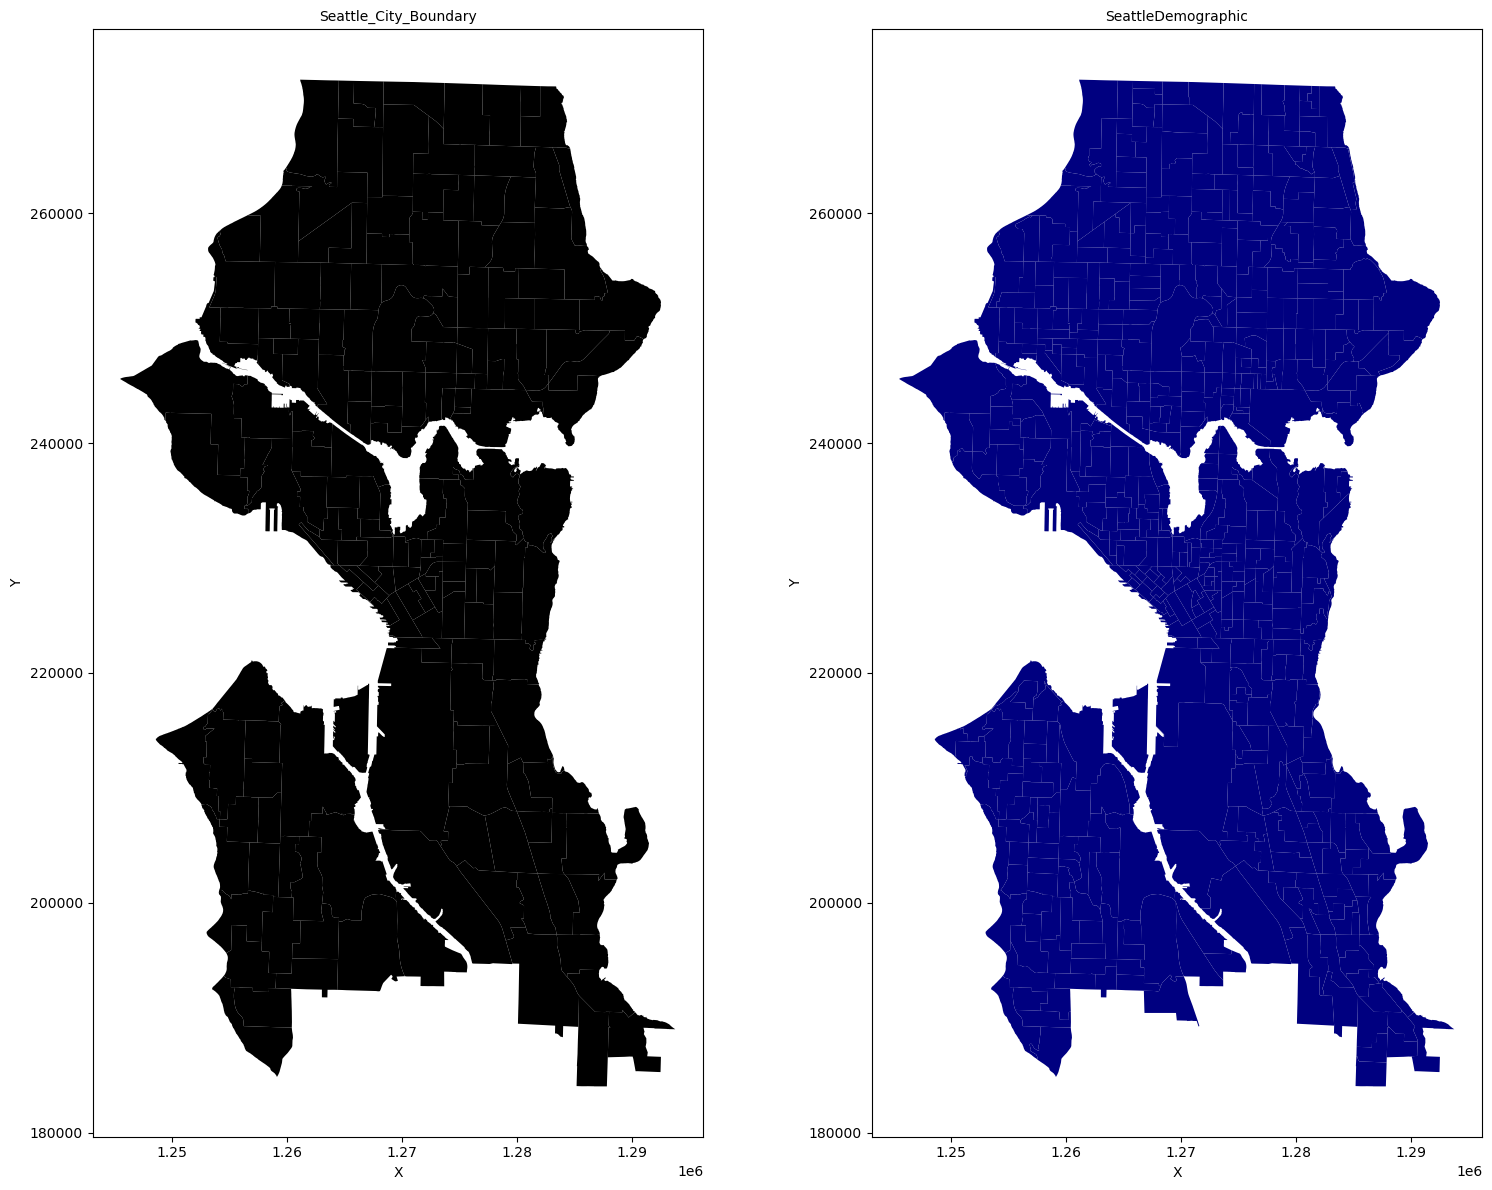

In [13]:
import matplotlib.pyplot as plt

# 创建子图布局
figure, axes = plt.subplots(1, 2, figsize=(16, 12))

# 在第一个子图上绘制 gdf_geojson
gdf_geojson.plot(ax=axes[0], color='k')
axes[0].set_title('Seattle_City_Boundary', fontsize=10)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# 在第二个子图上绘制 gdf
gdf.plot(ax=axes[1], color='navy')
axes[1].set_title('SeattleDemographic', fontsize=10)
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()


In [14]:
# 查看当前crs
print(gdf.crs)
epsg_code = gdf.crs.to_epsg() # CRS 唯一的标识符，称为 EPSG 代码
print(epsg_code)
# 如果CRS对象未设置EPSG代码或无法解析EPSG代码,to_epsg()可能会返回None

PROJCS["NAD83(HARN) / Washington North (ftUS)",GEOGCS["NAD83(HARN)",DATUM["NAD83_High_Accuracy_Reference_Network",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6152"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",47],PARAMETER["central_meridian",-120.833333333333],PARAMETER["standard_parallel_1",47.5],PARAMETER["standard_parallel_2",48.7333333333333],PARAMETER["false_easting",1640416.66666667],PARAMETER["false_northing",0],UNIT["US survey foot",0.304800609601219,AUTHORITY["EPSG","9003"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
None


In [15]:
# 转换crs
gdf_pro = gdf.to_crs(epsg=32633)
gdf_pro.crs
# 将 GeoDataFrame 的坐标参考系统（CRS）从一个 CRS 转换到另一个 CRS。

<Projected CRS: EPSG:32633>
Name: WGS 84 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°E and 18°E, northern hemisphere between equator and 84°N, onshore and offshore. Austria. Bosnia and Herzegovina. Cameroon. Central African Republic. Chad. Congo. Croatia. Czechia. Democratic Republic of the Congo (Zaire). Gabon. Germany. Hungary. Italy. Libya. Malta. Niger. Nigeria. Norway. Poland. San Marino. Slovakia. Slovenia. Svalbard. Sweden. Vatican City State.
- bounds: (12.0, 0.0, 18.0, 84.0)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
import geopandas as gpd

# 读取城市边界数据
gdf1 = gpd.read_file('Seattle_City_Boundary.geojson')

# 读取公园点位
gdf2 = gpd.read_file('SeattleParkPoints.geojson')

# 统一两个gdf拥有相同的crs
gdf1 = gdf1.to_crs(epsg = 4326) # 假设城市数据使用 WGS84 坐标系统
gdf2 = gdf2.to_crs(epsg = 4326) # 假设公园数据也使用 WGS84 坐标系统

In [17]:
gdf1.head()

,OBJECTID,GEOID20,GROSS_ACRES,LAND_ACRES,WATER_ACRES,NAME,TRACT_NUMB,BASENAME,UVDA_AREA,CRA_NO,CRA_GRP,GEN_ALIAS,DETL_NAMES,C_DISTRICT,geometry
0,1,53033000402,444.493643,444.527261,0.000000,Census Tract 4.02,402,4.02,Bitter Lake Village,9.1,9,Broadview/Bitter Lake,"Broadview, Bitter Lake",5,"POLYGON ((-122.34816 47.72322, -122.34738 47.7..."
1,2,53033000403,180.930716,165.408389,15.535762,Census Tract 4.03,403,4.03,Bitter Lake Village,9.1,9,Broadview/Bitter Lake,"Broadview, Bitter Lake",5,"POLYGON ((-122.35559 47.73414, -122.35558 47.7..."
2,3,53033000700,319.838996,319.862596,0.000000,Census Tract 7,700,7,Lake City,8.2,8,Olympic Hills/Victory Heights,"Lake City, Victory Heights, Olympic Hills, Pin...",5,"POLYGON ((-122.30729 47.71937, -122.30645 47.7..."
3,4,53033003302,154.942826,154.952619,0.000000,Census Tract 33.02,3302,33.02,Ballard,10.2,10,Whittier Heights,"Whittier Heights, Loyal Heights, Crown Hill",6,"POLYGON ((-122.36605 47.67956, -122.36599 47.6..."
4,5,53033003601,166.571397,166.583375,0.000000,Census Tract 36.01,3601,36.01,Green Lake - Roosevelt,9.4,9,Green Lake,"Green Lake, Meridian, Roosevelt, Woodland Park",6,"POLYGON ((-122.31738 47.67584, -122.31738 47.6..."


In [18]:
gdf2.head()

,OBJECTID,PROPNAME,ADDRESS,DIVISION,ADA,GIS_EDT_DT,LATITUDE,LONGITUDE,POINT_X,POINT_Y,...,LOCID,AMWO_ID,RES1,RES2,GLOBALID,GIS_CREATOR,GIS_CRT_DT,GIS_EDITOR,SDQL,geometry
0,7044,Alki Playground,5817 SW Lander St,South,Yes,"Mon, 29 Jul 2024 19:16:43 GMT",47.577899,-122.407731,1.251850e+06,214775.000001,...,1049,PLAY-ALKIPG,None,None,17ca3d9c-c23f-41f4-927f-5f4583822a15,SeattleParks_SeattleCityGIS,"Mon, 29 Jul 2024 19:16:43 GMT",SeattleParks_SeattleCityGIS,QL-D3,POINT (-122.40775 47.5779)
1,7045,B.F. Day Playground,4020 Fremont Ave N,North,Yes,"Mon, 29 Jul 2024 19:16:43 GMT",47.655668,-122.348906,1.266925e+06,242845.296892,...,2552,PLAY-DAYPG,None,None,2b87dea1-038d-4a59-98f0-db9ad09725ff,SeattleParks_SeattleCityGIS,"Mon, 29 Jul 2024 19:16:43 GMT",SeattleParks_SeattleCityGIS,QL-D3,POINT (-122.34892 47.65567)
2,7046,Ballard Playground,2644 NW 60th St,North,Yes,"Mon, 29 Jul 2024 19:16:43 GMT",47.672648,-122.392548,1.256297e+06,249252.812470,...,1108,PLAY-BLPG,None,None,ff837c9b-46fd-4b79-8eda-d51a40268425,SeattleParks_SeattleCityGIS,"Mon, 29 Jul 2024 19:16:43 GMT",SeattleParks_SeattleCityGIS,QL-D3,POINT (-122.39256 47.67265)
3,7047,Bayview Playground,2614 24th Ave W,Central,Yes,"Mon, 29 Jul 2024 19:16:43 GMT",47.644301,-122.386906,1.257478e+06,238886.812472,...,1110,PLAY-BVPG,None,None,c7a03c40-dbb7-4dcf-ac40-bb26e9c9b3b2,SeattleParks_SeattleCityGIS,"Mon, 29 Jul 2024 19:16:43 GMT",SeattleParks_SeattleCityGIS,QL-D3,POINT (-122.38692 47.64431)
4,7048,Bayview-Kinnear Park,3rd Ave W / W Prospect St,Central,Yes,"Mon, 29 Jul 2024 19:16:43 GMT",47.628900,-122.360237,1.263939e+06,233138.296906,...,2374,PLAY-KERPK,None,None,10ab7d68-dd5c-43cc-98a4-b85c233bdc56,SeattleParks_SeattleCityGIS,"Mon, 29 Jul 2024 19:16:43 GMT",SeattleParks_SeattleCityGIS,QL-D3,POINT (-122.36025 47.62891)


In [19]:
# 执行空间连接:将公园位置与城市边界进行匹配
gdf_join = gpd.sjoin(gdf2,gdf1,how = 'inner', predicate = 'intersects')
gdf_join.head()

,OBJECTID_left,PROPNAME,ADDRESS,DIVISION,ADA,GIS_EDT_DT,LATITUDE,LONGITUDE,POINT_X,POINT_Y,...,WATER_ACRES,NAME,TRACT_NUMB,BASENAME,UVDA_AREA,CRA_NO,CRA_GRP,GEN_ALIAS,DETL_NAMES,C_DISTRICT
0,7044,Alki Playground,5817 SW Lander St,South,Yes,"Mon, 29 Jul 2024 19:16:43 GMT",47.577899,-122.407731,1.251850e+06,214775.000001,...,397.128742,Census Tract 97.01,9701,97.01,Outside - West Seattle,1.4,1,Alki/Admiral,"Alki, Admiral",1
1,7045,B.F. Day Playground,4020 Fremont Ave N,North,Yes,"Mon, 29 Jul 2024 19:16:43 GMT",47.655668,-122.348906,1.266925e+06,242845.296892,...,4.291726,Census Tract 49.02,4902,49.02,Fremont - Wallingford,11.1,11,Fremont,"Fremont, Wallingford, Northlake",6
2,7046,Ballard Playground,2644 NW 60th St,North,Yes,"Mon, 29 Jul 2024 19:16:43 GMT",47.672648,-122.392548,1.256297e+06,249252.812470,...,0.000000,Census Tract 32.02,3202,32.02,Ballard,10.3,10,Sunset Hill/Loyal Heights,"Sunset Hill, Golden Gardens, Loyal Heights, Sh...",6
3,7047,Bayview Playground,2614 24th Ave W,Central,Yes,"Mon, 29 Jul 2024 19:16:43 GMT",47.644301,-122.386906,1.257478e+06,238886.812472,...,0.000000,Census Tract 58.03,5803,58.03,Interbay,12.2,12,Interbay,Interbay,7
4,7048,Bayview-Kinnear Park,3rd Ave W / W Prospect St,Central,Yes,"Mon, 29 Jul 2024 19:16:43 GMT",47.628900,-122.360237,1.263939e+06,233138.296906,...,0.000000,Census Tract 70.01,7001,70.01,Queen Anne,12.3,12,Queen Anne,"Queen Anne, Lower Queen Anne, Uptown, Seattle ...",7


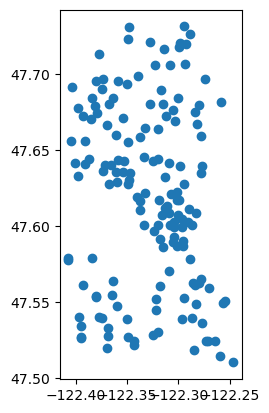

In [20]:
gdf_join.plot()
plt.show()

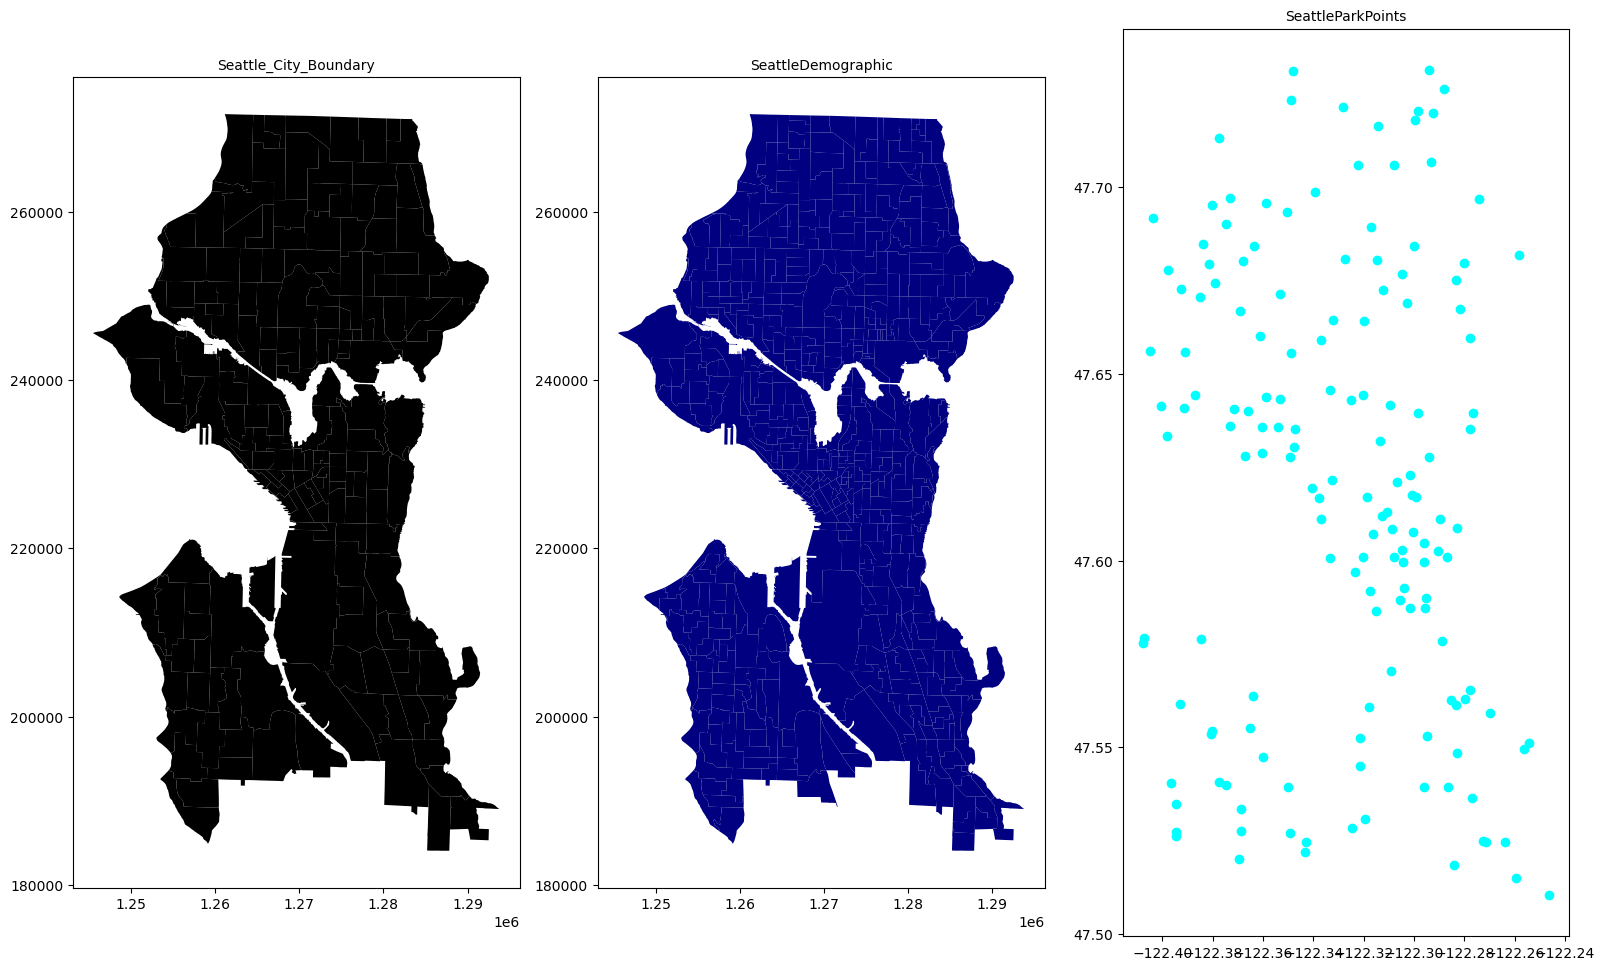

In [21]:
import matplotlib.pyplot as plt

# 创建子图布局
figure, axes = plt.subplots(1, 3, figsize=(16, 12))

# 在第一个子图上绘制 gdf_geojson
gdf_geojson.plot(ax=axes[0], color='k')
axes[0].set_title('Seattle_City_Boundary', fontsize=10)

# 在第二个子图上绘制 gdf
gdf.plot(ax=axes[1], color='navy')
axes[1].set_title('SeattleDemographic', fontsize=10)

# 在第二个子图上绘制 gdf_join

gdf_join.plot(ax=axes[2], color='cyan')
axes[2].set_title('SeattleParkPoints', fontsize=10)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

In [23]:
# 确保公园点位和边界地图使用相同的坐标系统
if gdf_join.crs != gdf.crs:
    gdf_join = gdf_join.to_crs(gdf.crs)

# 裁剪,使其拥有相同的边界以内的部分
gdf_clipped = gdf.clip(gdf_join)

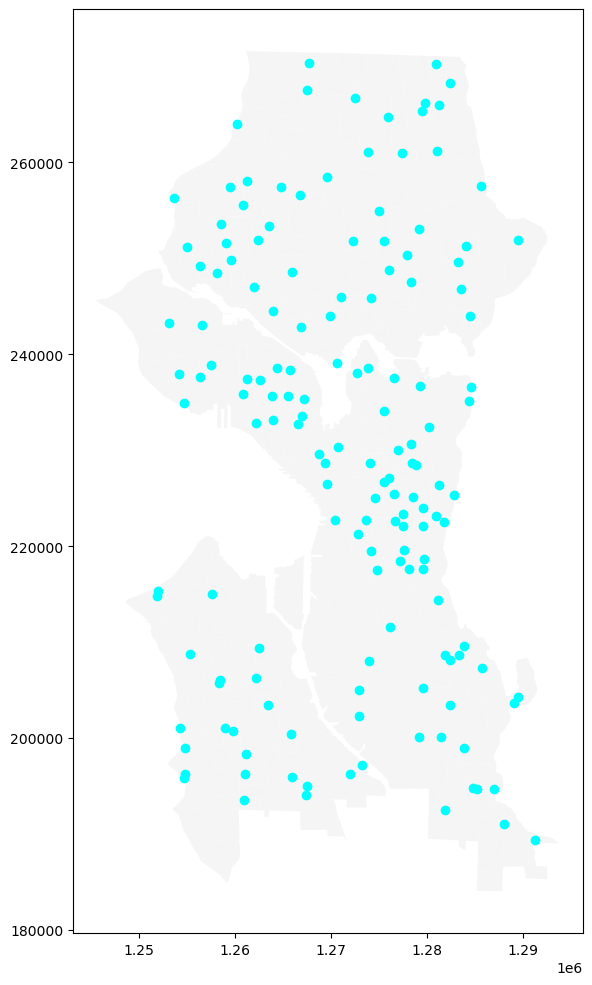

In [26]:
figure, ax = plt.subplots(1, 1, figsize=(8, 12))
gdf.plot(color='whitesmoke',ax = ax)
gdf_join.plot(color='cyan',ax = ax)
plt.show()